In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from scipy.optimize import lsq_linear
from IPython.display import display, HTML
import matplotlib.pyplot as plt


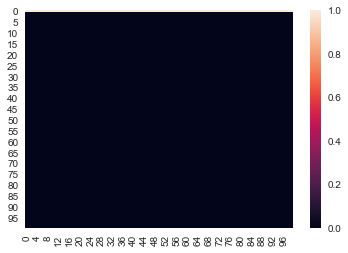

In [2]:
sns.heatmap(pd.read_csv('cantidades_rayos.csv', header=None))

In [8]:
matriz_sist = pd.read_csv('matriz_sist.csv', header=None)
tiempos_sist = pd.read_csv('tiempos_sist.csv', header=None)

In [4]:
res = lsq_linear(matriz_sist, tiempos_sist[0], lsmr_tol='auto', verbose=1)

The unconstrained solution is optimal.
Final cost 4.8061e+02, first-order optimality 2.72e+01


In [5]:
cant_tot = 0
cant_zero = 0
cant_uno = 0
for ind in matriz_sist.index:
    for col in matriz_sist.columns:
        cant_tot += 1
        if matriz_sist.iloc[ind,col] == 0:
            cant_zero += 1
        elif matriz_sist.iloc[ind,col] == 1:
            cant_uno += 1
print(cant_tot, cant_zero, cant_uno)

8750000 8552942 197058


In [6]:
solucion = res.x
img_reconstruida = pd.DataFrame(index=range(50), columns=range(50), dtype=float)
for i in range(solucion.shape[0]):
    if not np.isnan(solucion[i]):
        if solucion[i] != 0:
            img_reconstruida.iloc[int(i/50), i%50] = float(1/solucion[i])
    else:
        print("nan")
    if type(solucion[i]) != np.float64:
        print("asdad")

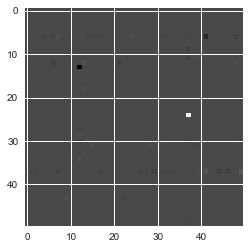

In [7]:
plt.imshow(img_reconstruida, plt.cm.gray)
plt.show()

In [17]:
asd = np.array(matriz_sist)
prod = np.matmul(np.transpose(asd), asd)

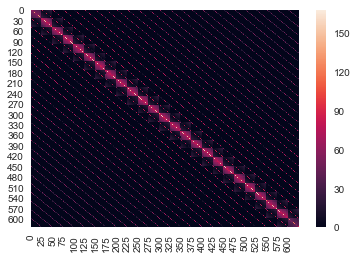

In [28]:
sns.heatmap(pd.read_csv('matrizprod.csv', header=None))

In [29]:
np.all(np.linalg.eigvals(pd.read_csv('matrizprod.csv', header=None)) > 0)

False